In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd

In [2]:
df_count_2016 = pd.read_excel("2016_count_data.xlsx",sheet_name='June 2016 Data')

In [3]:
df_count_2016.head()

,Unnamed: 0,Hour ->,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,latitude,longitude
0,All sites,Bike,107,59,19,23,30,159,474,1094,...,934,1827,1540,1029,741,513,328,257,NaN,NaN
1,All Sites,MV,5413,3314,2258,1765,3117,9476,18322,24567,...,28409,28651,26946,22123,18741,17220,15379,10798,NaN,NaN
2,A Street north of Iron Street,Bike,2,2,3,0,3,8,31,72,...,45,103,88,53,30,20,18,14,42.345038,-71.052232
3,A Street north of Iron Street,MV,180,122,70,89,126,320,590,671,...,975,794,819,566,484,407,338,236,42.345038,-71.052232
4,Beacon Street east of Mountfort Street,Bike,5,2,0,1,0,5,19,67,...,41,137,83,46,55,10,6,19,42.347440,-71.101721


In [4]:
#load block data


df_block = pd.read_csv("bike_block.csv")

df_block['open_dt'] = pd.to_datetime(df_block['open_dt'])
df_block['target_dt'] = pd.to_datetime(df_block['target_dt'])
df_block['closed_dt'] = pd.to_datetime(df_block['closed_dt'])

In [5]:
# df_block.info()

df_block.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 29 columns):
case_enquiry_id                   518 non-null int64
open_dt                           518 non-null datetime64[ns]
target_dt                         496 non-null datetime64[ns]
closed_dt                         516 non-null datetime64[ns]
ontime                            518 non-null object
case_status                       518 non-null object
closure_reason                    518 non-null object
case_title                        518 non-null object
subject                           518 non-null object
reason                            518 non-null object
type                              518 non-null object
queue                             518 non-null object
department                        518 non-null object
submittedphoto                    280 non-null object
closedphoto                       53 non-null object
location                          518 non-null object
fire_dist

In [6]:
df_block_2016 = df_block[(df_block['open_dt'] > '2016') & (df_block['open_dt'] < '2017')]

df_block_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 46 to 333
Data columns (total 29 columns):
case_enquiry_id                   70 non-null int64
open_dt                           70 non-null datetime64[ns]
target_dt                         66 non-null datetime64[ns]
closed_dt                         70 non-null datetime64[ns]
ontime                            70 non-null object
case_status                       70 non-null object
closure_reason                    70 non-null object
case_title                        70 non-null object
subject                           70 non-null object
reason                            70 non-null object
type                              70 non-null object
queue                             70 non-null object
department                        70 non-null object
submittedphoto                    35 non-null object
closedphoto                       16 non-null object
location                          70 non-null object
fire_district           

In [7]:
# match blocks and bike count

block_count_dict = {}

for row in df_block_2016.itertuples(index=True, name='Pandas'):
    block_count_dict[getattr(row, "Index")]= []
    lat =getattr(row, "latitude")
    long = getattr(row, "longitude")
    
    for row2 in df_count_2016.itertuples(index=True, name='Pandas'):
        bool_location = (abs(getattr(row2, "latitude") - lat) < 0.001) and (abs(getattr(row2, "longitude") - long)< 0.001)
        if(bool_location):
            block_count_dict[getattr(row, "Index")].append(getattr(row2, "Index")) 

In [8]:
for key, val in block_count_dict.items():
    print(key, " : ", val)

46  :  []
48  :  []
49  :  []
50  :  []
51  :  []
52  :  []
53  :  []
54  :  []
55  :  []
56  :  []
58  :  []
59  :  []
60  :  []
61  :  []
62  :  []
63  :  []
64  :  []
65  :  []
66  :  []
67  :  []
68  :  []
69  :  []
70  :  [20, 21, 22, 23]
71  :  []
72  :  []
73  :  []
74  :  []
75  :  []
76  :  []
77  :  []
294  :  []
295  :  []
296  :  []
297  :  []
298  :  []
299  :  []
300  :  []
301  :  []
302  :  []
303  :  []
304  :  []
305  :  []
306  :  []
307  :  []
308  :  []
309  :  []
310  :  []
311  :  []
312  :  []
313  :  []
314  :  []
315  :  []
316  :  []
317  :  []
318  :  []
319  :  []
320  :  []
321  :  []
322  :  []
323  :  []
324  :  []
325  :  []
326  :  []
327  :  []
328  :  []
329  :  []
330  :  []
331  :  []
332  :  []
333  :  []


In [9]:
df_block_2016.loc[ 70, : ]

case_enquiry_id                                                        101001949599
open_dt                                                         2016-11-10 16:44:00
target_dt                                                       2016-11-16 16:44:05
closed_dt                                                       2016-11-21 08:24:17
ontime                                                                      OVERDUE
case_status                                                                  Closed
closure_reason                    Case Closed. Closed date : 2016-11-21 08:24:17...
case_title                                                    Contractor Complaints
subject                                                     Public Works Department
reason                                                          Highway Maintenance
type                                                          Contractor Complaints
queue                                                    PWDx_Contractor Com

In [10]:
df_count_2016.loc[ [20, 22], : ]

,Unnamed: 0,Hour ->,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,latitude,longitude
20,Commonwealth Avenue EB west of Silber Way,Bike,2,3,0,0,2,13,40,84,...,31,52,32,29,16,16,9,3,42.349254,-71.100703
22,Commonwealth Avenue WB west of Silber Way,Bike,9,4,2,0,1,4,1,5,...,19,17,27,16,10,17,6,1,42.349491,-71.100679


In [42]:
df_count_correlation = df_count_2016.loc[ [20, 22], :]

In [75]:
df1 = df_count_correlation.loc[[20], df_count_correlation.columns[2:26]]
df2 = df_count_correlation.loc[[22], df_count_correlation.columns[2:26]]

In [76]:
# extract the count data of matching places

Row_list = []
for i in range((df1.shape[0])): 
  
    # Using iloc to access the values of  
    # the current row denoted by "i" 
    Row_list.append(list(df1.iloc[i, :]))
Row_list = list(map(list, zip(*Row_list)))

Row_list2 = []
for i in range((df1.shape[0])): 
  
    # Using iloc to access the values of  
    # the current row denoted by "i" 
    Row_list2.append(list(df2.iloc[i, :]))
Row_list2 = list(map(list, zip(*Row_list2)))

C:\Users\synox\Anaconda3\envs\cs542\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\synox\Anaconda3\envs\cs542\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


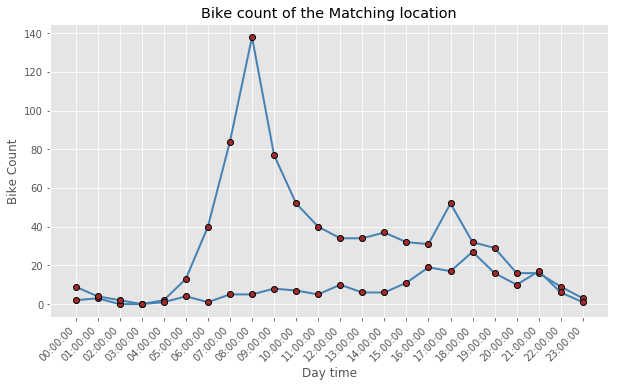

In [79]:
# plot the bike count for matched places

plt. style.use("ggplot")
fig = plt.figure(figsize = (10,6))
plt.plot(["00:00:00","01:00:00","02:00:00","03:00:00","04:00:00","05:00:00","06:00:00","07:00:00","08:00:00","09:00:00","10:00:00","11:00:00","12:00:00","13:00:00","14:00:00","15:00:00","16:00:00","17:00:00","18:00:00","19:00:00","20:00:00","21:00:00","22:00:00","23:00:00"], # x data
         Row_list, # y data
         linestyle = '-', # line type
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6, 
         markeredgecolor='black', 
         markerfacecolor='brown') 

plt.plot(["00:00:00","01:00:00","02:00:00","03:00:00","04:00:00","05:00:00","06:00:00","07:00:00","08:00:00","09:00:00","10:00:00","11:00:00","12:00:00","13:00:00","14:00:00","15:00:00","16:00:00","17:00:00","18:00:00","19:00:00","20:00:00","21:00:00","22:00:00","23:00:00"], # x data
         Row_list2, # y data
         linestyle = '-', # line type
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6, 
         markeredgecolor='black', 
         markerfacecolor='brown') 



plt.title('Bike count of the Matching location')
plt.xlabel('Day time')
plt.ylabel('Bike Count')

plt.tick_params(top = 'off', right = 'off')

# rotation 45°
fig.autofmt_xdate(rotation = 45)
plt.show()